In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import numpy as np 
import matplotlib.pyplot as plt


data_df = pd.read_csv("/Users/rahulkailasa/Desktop/SJSU/MSDA/Sem_2/ML/Project/Dataset/New_dataset/tsv_files/NSDUH_2015-2019_combined.csv", low_memory=False)
data_df.head()
print('Step 0. num_users: %d  num_features: %d' % (data_df.shape[0], data_df.shape[1]))

# subs_df = data_df.iloc[:, :data_df.columns.get_loc("STMNORXFG")]

# hlth_df = data_df.iloc[:, data_df.columns.get_loc("PREGNANT"):data_df.columns.get_loc("YOTMTHLP")]

# demo_df = data_df.iloc[:, data_df.columns.get_loc("AGE2"):data_df.columns.get_loc("POVERTY3")]

In [73]:
import pandas as pd

def read_csv_in_chunks(filepath, chunk_size=10000, columns=None):

    chunks = []
    
    # Read CSV in chunks
    for chunk in pd.read_csv(filepath, chunksize=chunk_size, low_memory=False):
        chunks.append(chunk)
    
    # Combine all chunks and clear chunks list
    df = pd.concat(chunks, ignore_index=True)
    del chunks
    
    return df

# Example usage:
data_df = read_csv_in_chunks('/Users/rahulkailasa/Desktop/SJSU/MSDA/Sem_2/ML/Project/Dataset/New_dataset/tsv_files/NSDUH_2015-2019_combined.csv', chunk_size=10000)

In [74]:
data_df.shape

(282768, 2813)

In [75]:


cols = ['CRKEVER', 'COCEVER', 'IRALCFY', 'CATAG3', 'HEALTH', 'IRWRKSTAT', 'IREDUHIGHST2', 'NEWRACE2', 'IRSEX', 
'IRPINC3', 'IRKI17_2',  'IRMJFY',  'WRKDHRSWK2', 'IRHHSIZ2', 'CIG30USE', 'IRHERFY', 'IRMETHAMYFQ', 'year']

In [77]:
missing_cols = [col for col in cols if col not in data_df.columns]
if missing_cols:
    print(f"The following columns are missing in the DataFrame: {missing_cols}")

In [78]:
if_col = [col for col in cols if col in df.columns]
print(if_col)


['CRKEVER', 'COCEVER', 'IRALCFY', 'CATAG3', 'HEALTH', 'IRWRKSTAT', 'IREDUHIGHST2', 'NEWRACE2', 'IRSEX', 'IRPINC3', 'IRKI17_2', 'IRMJFY', 'WRKDHRSWK2', 'IRHHSIZ2', 'CIG30USE', 'IRHERFY', 'IRMETHAMYFQ', 'year']


In [80]:
selected_cols_df = data_df[if_col]

In [81]:
selected_cols_df.isna().sum()

CRKEVER         0
COCEVER         0
IRALCFY         0
CATAG3          0
HEALTH          0
IRWRKSTAT       0
IREDUHIGHST2    0
NEWRACE2        0
IRSEX           0
IRPINC3         0
IRKI17_2        0
IRMJFY          0
WRKDHRSWK2      0
IRHHSIZ2        0
CIG30USE        0
IRHERFY         0
IRMETHAMYFQ     0
year            0
dtype: int64

In [82]:
cl_df = selected_cols_df.copy(deep=True)

In [79]:
for i, col in enumerate(cols):
    print(f"Column {i + 1}: {col}")
    print(cl_df[col].unique())
    print("-" * 40)


Column 1: CRKEVER
[ 0.  1. nan]
----------------------------------------
Column 2: COCEVER
[ 0.  1. nan]
----------------------------------------
Column 3: IRALCFY
[  5  52  48   2   6 120  84   0  12  24  14  96   3 360 260 144 156 340
 336 104   7  29  36 350 208 312   1  32 338  30 168 364   4  60  72 363
 365  40  51 353  20   9  15   8  10 180 240  26  53 339  19 345 288  11
 300 108  90 216 361  61  21  25 341  13 196  83 228  18  50  58  45  22
 362 250  42  17 342  44 357 276  28 358  70  89  43  35 100 351 344 210
 355  49 192  78 141  64 275 110  80  47 150  27 200 133  16  67 132 106
  46  79 297 324  75  34 145  56  23 280  97  31 313 261 204 359 264 165
 252 348  38 337 325 138 153  95  87 356 160  33 179  94  39 347 187 171
  55  65 117 157  71 155 164 176 343  74 140 290  62 220 265 190  91 102
 126 151 121  66 105 109  59  68  73 119 123  37  41 256  54 235  63 175
 111  57 330 112  98 268 149  93 195  92 274 225 285 241 143 166 212 147
 103 230 163 349  69 287 118 214 

In [83]:
continuous_cols = ['IRALCFY', 'IRMJFY', 'WRKDHRSWK2', 'IRHERFY', 'IRMETHAMYFQ' ]
ordinal_cols =[x for x in cols if x not in cont_cols]
print(ordinal_cols)


['CRKEVER', 'COCEVER', 'CATAG3', 'HEALTH', 'IRWRKSTAT', 'IREDUHIGHST2', 'NEWRACE2', 'IRSEX', 'IRPINC3', 'IRKI17_2', 'IRHHSIZ2', 'CIG30USE', 'year']


In [85]:
def continuous_clean_data(x):
    bad_data_codes = {-9, 985, 989} | set(range(994, 1000)) #codes for "bad data", "dont know", "skip", "refused", or "blank"
    zero_data_codes = {991, 993} #codes for never done, not done which is equal to 0 as number
     
    if x in bad_data_codes: return np.nan
    if x in zero_data_codes: return 0
    return x

def ordinal_clean_data(x):
    bad_data_codes = {-9, 85, 89} | set(range(94, 100)) #codes for "bad data", "dont know", "skip", "refused", or "blank"
    zero_data_codes = {91, 93} #codes for never done, not done which is equal to 0 as number
    
    if x in bad_data_codes: return np.nan
    if x in zero_data_codes: return 0
    return x

In [ ]:
import numpy as np
# Changes for wrkdhrsw2
cl_df.loc[(cl_df.IRWRKSTAT == 3) | (cl_df.IRWRKSTAT == 4), "WRKDHRSWK2"] = 0
cl_df.loc[cl_df.WRKDHRSWK2 == 61, "WRKDHRSWK2"] = np.nan

# Changes for binary categorical variables
cl_df.loc[(cl_df.COCEVER == 2), "COCEVER"] = 0
cl_df.loc[(cl_df.CRKEVER == 2), "CRKEVER"] = 0
cl_df.loc[(cl_df.IRSEX == 2), "IRSEX"] = 0

# Apply clean_data functions
cl_df[continuous_cols] = cl_df[continuous_cols].applymap(continuous_clean_data)
cl_df[ordinal_cols] = cl_df[ordinal_cols].applymap(ordinal_clean_data)

cl_df

In [19]:
def cont_clean_data(x):

    # Survey codes for "Bad Data", Don't Know, Skip, Refused, or Blank
    if ((x == -9) |
    (x == 985) |
    (x == 989) |
    ((x >= 994) & (x < 1000))):
        return np.nan

    # Codes for "Have never done..." or "Have not done in the past X days"
    # Equivalent to 0 for numbered questions
    if ((x == 991) | 
    (x == 993)):
        return 0

    # Ignore value if conditions don't match
    return x 

# Function that cleans all other special data codes
def ord_clean_data(x):

    # Survey codes for "Bad Data", Don't Know, Skip, Refused, or Blank
    if ((x == -9) |
    ((x >= 94) & (x < 100)) |
    (x == 85) |
    (x == 89)):
        return np.nan

    # Codes for "Have never done..." or "Have not done in the past X days"
    # Equivalent to 0 for numbered questions
    if ((x == 91) |
    (x == 93)):
        return 0

    # Ignore value if conditions don't match
    return x 


In [86]:
import numpy as np
# Changes for wrkdhrsw2
cl_df.loc[(cl_df.IRWRKSTAT == 3) | (cl_df.IRWRKSTAT == 4), "WRKDHRSWK2"] = 0
cl_df.loc[cl_df.WRKDHRSWK2 == 61, "WRKDHRSWK2"] = np.nan

# Changes for binary categorical variables
cl_df.loc[(cl_df.COCEVER == 2), "COCEVER"] = 0
cl_df.loc[(cl_df.CRKEVER == 2), "CRKEVER"] = 0
cl_df.loc[(cl_df.IRSEX == 2), "IRSEX"] = 0

# Apply clean_data functions
cl_df[continuous_cols] = cl_df[continuous_cols].applymap(continuous_clean_data)
cl_df[ordinal_cols] = cl_df[ordinal_cols].applymap(ordinal_clean_data)

cl_df

/var/folders/9n/27ybx2053616fhxv3ncx4v380000gn/T/ipykernel_15028/278209739.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cl_df[continuous_cols] = cl_df[continuous_cols].applymap(continuous_clean_data)
/var/folders/9n/27ybx2053616fhxv3ncx4v380000gn/T/ipykernel_15028/278209739.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cl_df[ordinal_cols] = cl_df[ordinal_cols].applymap(ordinal_clean_data)


,CRKEVER,COCEVER,IRALCFY,CATAG3,HEALTH,IRWRKSTAT,IREDUHIGHST2,NEWRACE2,IRSEX,IRPINC3,IRKI17_2,IRMJFY,WRKDHRSWK2,IRHHSIZ2,CIG30USE,IRHERFY,IRMETHAMYFQ,year
0,0.0,0.0,5,1,2.0,4.0,7,1,1,1,2,0,0.0,1,0.0,0,0,2015
1,1.0,1.0,52,4,1.0,1.0,8,7,1,2,3,364,40.0,4,0.0,0,0,2015
2,0.0,0.0,48,3,2.0,4.0,11,1,0,1,1,0,0.0,1,0.0,0,0,2015
3,0.0,0.0,2,1,3.0,NaN,4,7,0,1,4,0,NaN,5,0.0,0,0,2015
4,0.0,0.0,6,2,3.0,4.0,9,1,0,1,3,0,0.0,4,22.0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282763,0.0,0.0,104,2,2.0,1.0,9,7,0,3,1,2,40.0,2,0.0,0,0,2019
282764,0.0,0.0,10,3,2.0,2.0,11,5,0,2,1,0,26.0,2,0.0,0,0,2019
282765,0.0,0.0,0,1,2.0,NaN,4,1,1,1,3,0,NaN,6,0.0,0,0,2019
282766,0.0,0.0,1,1,2.0,3.0,11,7,0,1,4,0,0.0,6,0.0,0,0,2019


In [87]:
for i, col in enumerate(cols):
    print(f"Column {i + 1}: {col}")
    print(cl_df[col].unique())
    print("-" * 40)

Column 1: CRKEVER
[ 0.  1. nan]
----------------------------------------
Column 2: COCEVER
[ 0.  1. nan]
----------------------------------------
Column 3: IRALCFY
[  5  52  48   2   6 120  84   0  12  24  14  96   3 360 260 144 156 340
 336 104   7  29  36 350 208 312   1  32 338  30 168 364   4  60  72 363
 365  40  51 353  20   9  15   8  10 180 240  26  53 339  19 345 288  11
 300 108  90 216 361  61  21  25 341  13 196  83 228  18  50  58  45  22
 362 250  42  17 342  44 357 276  28 358  70  89  43  35 100 351 344 210
 355  49 192  78 141  64 275 110  80  47 150  27 200 133  16  67 132 106
  46  79 297 324  75  34 145  56  23 280  97  31 313 261 204 359 264 165
 252 348  38 337 325 138 153  95  87 356 160  33 179  94  39 347 187 171
  55  65 117 157  71 155 164 176 343  74 140 290  62 220 265 190  91 102
 126 151 121  66 105 109  59  68  73 119 123  37  41 256  54 235  63 175
 111  57 330 112  98 268 149  93 195  92 274 225 285 241 143 166 212 147
 103 230 163 349  69 287 118 214 

In [23]:
cl_df.isna().sum()

CRKEVER           133
COCEVER           116
IRALCFY             0
CATAG3              0
HEALTH             55
IRWRKSTAT       33375
IREDUHIGHST2        0
NEWRACE2            0
IRSEX               0
IRPINC3             0
IRKI17_2            0
IRMJFY              0
WRKDHRSWK2      55261
IRHHSIZ2            0
CIG30USE          550
IRHERFY             0
IRMETHAMYFQ         0
year                0
dtype: int64

In [89]:
cl_df['COCCRKEVER'] = np.zeros(df.shape[0])
cl_df.loc[(cl_df.COCEVER == 1) | (cl_df.CRKEVER == 1), "COCCRKEVER"] = 1

cl_df.loc[(cl_df.COCEVER == np.nan) & (cl_df.CRKEVER == np.nan), "COCCRKEVER"] = np.nan
cl_df

,CRKEVER,COCEVER,IRALCFY,CATAG3,HEALTH,IRWRKSTAT,IREDUHIGHST2,NEWRACE2,IRSEX,IRPINC3,IRKI17_2,IRMJFY,WRKDHRSWK2,IRHHSIZ2,CIG30USE,IRHERFY,IRMETHAMYFQ,year,COCCRKEVER
0,0.0,0.0,5,1,2.0,4.0,7,1,1,1,2,0,0.0,1,0.0,0,0,2015,0.0
1,1.0,1.0,52,4,1.0,1.0,8,7,1,2,3,364,40.0,4,0.0,0,0,2015,1.0
2,0.0,0.0,48,3,2.0,4.0,11,1,0,1,1,0,0.0,1,0.0,0,0,2015,0.0
3,0.0,0.0,2,1,3.0,NaN,4,7,0,1,4,0,NaN,5,0.0,0,0,2015,0.0
4,0.0,0.0,6,2,3.0,4.0,9,1,0,1,3,0,0.0,4,22.0,0,0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282763,0.0,0.0,104,2,2.0,1.0,9,7,0,3,1,2,40.0,2,0.0,0,0,2019,0.0
282764,0.0,0.0,10,3,2.0,2.0,11,5,0,2,1,0,26.0,2,0.0,0,0,2019,0.0
282765,0.0,0.0,0,1,2.0,NaN,4,1,1,1,3,0,NaN,6,0.0,0,0,2019,0.0
282766,0.0,0.0,1,1,2.0,3.0,11,7,0,1,4,0,0.0,6,0.0,0,0,2019,0.0


In [92]:
# cl_df.drop('coccrkever', axis=1)
cl_df.isna().sum()

CRKEVER           133
COCEVER           116
IRALCFY             0
CATAG3              0
HEALTH             55
IRWRKSTAT       33375
IREDUHIGHST2        0
NEWRACE2            0
IRSEX               0
IRPINC3             0
IRKI17_2            0
IRMJFY              0
WRKDHRSWK2      55261
IRHHSIZ2            0
CIG30USE          550
IRHERFY             0
IRMETHAMYFQ         0
year                0
COCCRKEVER          0
dtype: int64

In [91]:
cl_df[['COCEVER','CRKEVER','COCCRKEVER']].sum()

COCEVER       33316.0
CRKEVER        7578.0
COCCRKEVER    33316.0
dtype: float64

In [28]:
from scipy.stats import chi2_contingency, chi2

In [93]:
# df2_clean will be cl_df with no NaN values
df2_clean = cl_df.copy(deep=True)
df2_clean = df2_clean.drop(['IRWRKSTAT'], axis=1).dropna()
df2_clean.isna().sum()


CRKEVER         0
COCEVER         0
IRALCFY         0
CATAG3          0
HEALTH          0
IREDUHIGHST2    0
NEWRACE2        0
IRSEX           0
IRPINC3         0
IRKI17_2        0
IRMJFY          0
WRKDHRSWK2      0
IRHHSIZ2        0
CIG30USE        0
IRHERFY         0
IRMETHAMYFQ     0
year            0
COCCRKEVER      0
dtype: int64

In [30]:
import seaborn as sns
sns.set(font_scale=1.2)

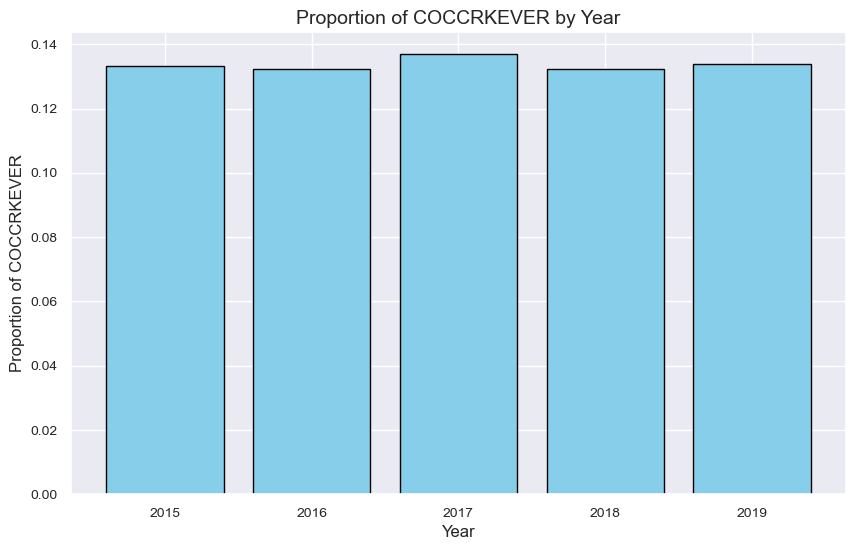

In [94]:
import matplotlib.pyplot as plt

# Aggregate the data to calculate the proportion of COCCRKEVER per year
df_agg = (
    df2_clean.groupby("year")["COCCRKEVER"]
    .apply(lambda x: sum(x) / len(x))
    .reset_index()
)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_agg["year"], df_agg["COCCRKEVER"], color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Proportion of COCCRKEVER", fontsize=12)
plt.title("Proportion of COCCRKEVER by Year", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


In [33]:
# Observe the total "Yes" and "No" answers for crack/cocaine users by year
df2_clean.groupby('COCCRKEVER').year.value_counts()

COCCRKEVER  year
0.0         2015    39924
            2016    39460
            2018    39199
            2017    39024
            2019    39006
1.0         2017     6190
            2015     6142
            2019     6033
            2016     6017
            2018     5982
Name: count, dtype: int64

In [35]:
no_values = []
yes_values = []

# Append lists with yes/no values, where indices correspond to a given year
for year in range(2015, 2020):
    no_values.append(df2_clean.groupby('COCCRKEVER').year.value_counts()[0][year])
    yes_values.append(df2_clean.groupby('COCCRKEVER').year.value_counts()[1][year])

# Create 2D matrix of values
chi_matrix = [no_values, yes_values]
chi_matrix

[[39924, 39460, 39024, 39199, 39006], [6142, 6017, 6190, 5982, 6033]]

In [36]:
# Use alpha of 0.05, but in reality our test is two-tailed
significance = 0.05
stat, p, dof, expected = chi2_contingency(chi_matrix)
critical = chi2.ppf(significance, dof)
print("P-value = %f\nChi-Squared Stat = %f\nCritical Value = %f" %(p, stat, critical))

P-value = 0.240431
Chi-Squared Stat = 5.492033
Critical Value = 0.710723


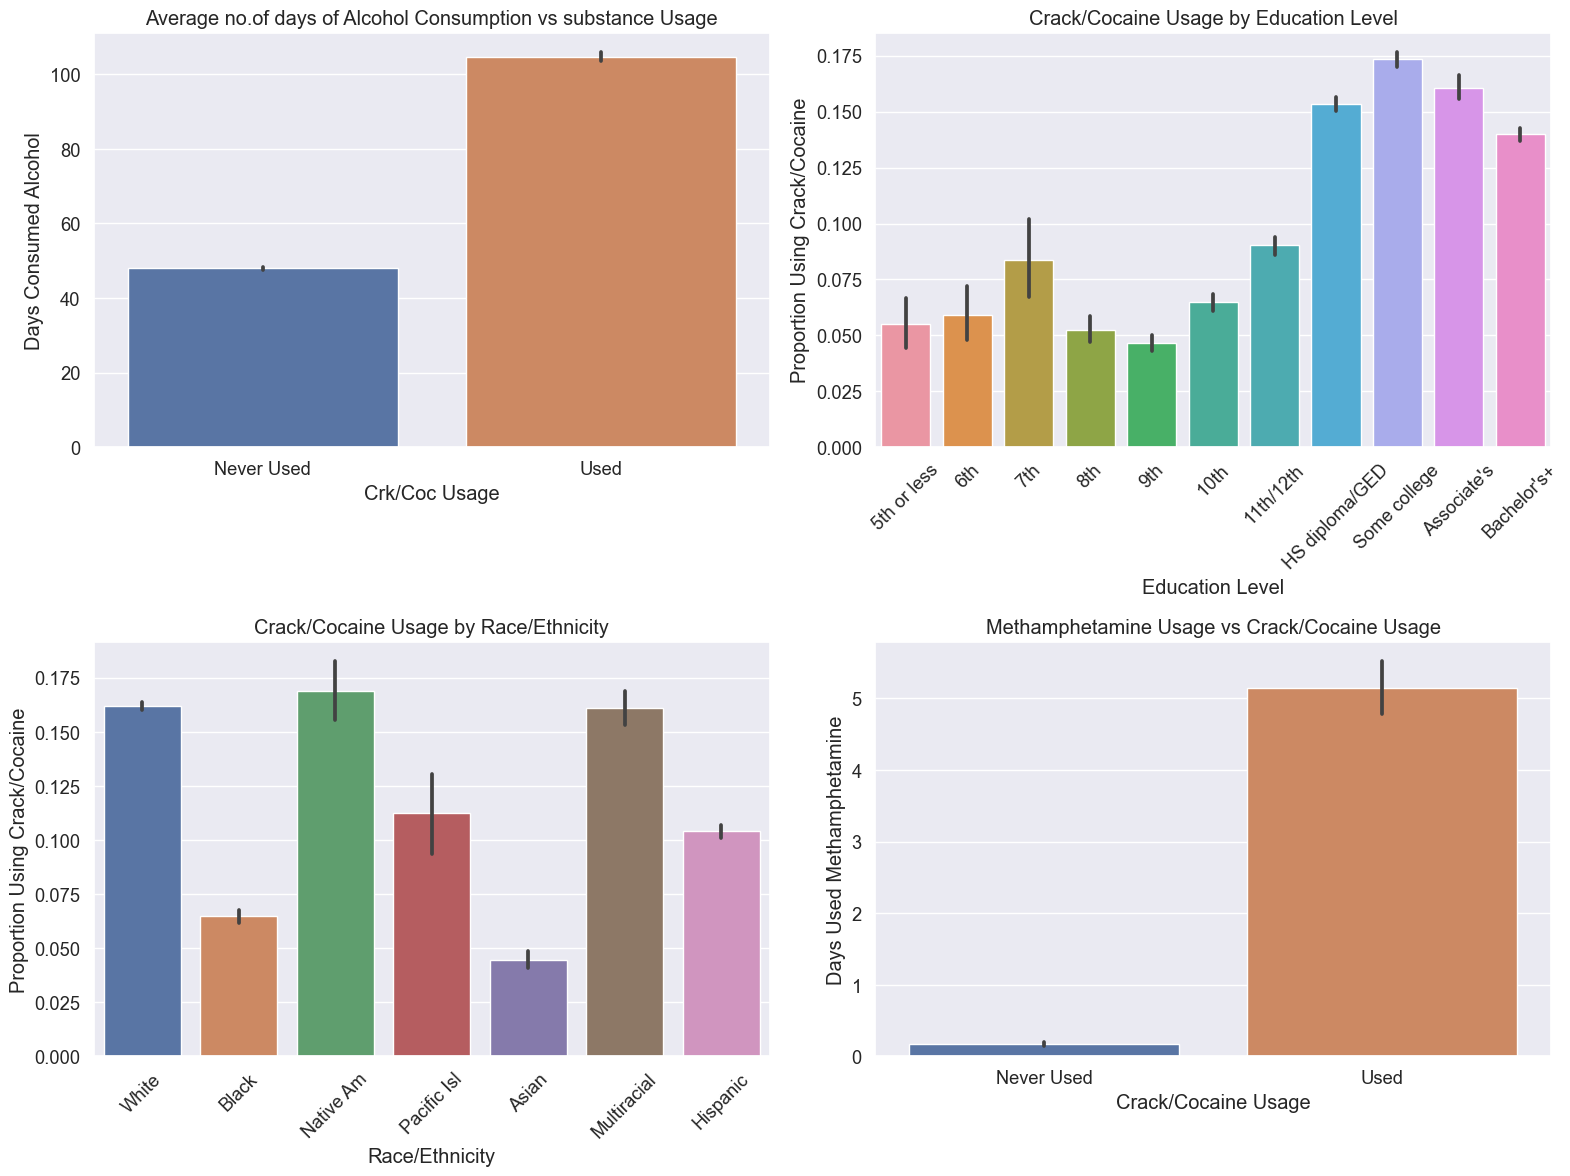

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plotting parameters
# plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.7

# Create main figure
fig = plt.figure()

# Original plots with enhanced styling
plot_bar(df2_clean,[2, 2, 1], 'COCCRKEVER', 'IRALCFY', 'Crk/Coc Usage', 'Days Consumed Alcohol', 
         "Average no.of days of Alcohol Consumption vs substance Usage", 
         ["Never Used", "Used"])

plot_bar(df2_clean,[2, 2, 2], 'IREDUHIGHST2', 'COCCRKEVER', 'Education Level', 
         'Proportion Using Crack/Cocaine', 
         "Crack/Cocaine Usage by Education Level",
         ["5th or less", "6th", "7th", "8th", "9th", "10th", "11th/12th", 
          "HS diploma/GED", "Some college", "Associate's", "Bachelor's+"], 45)

plot_bar(df2_clean,[2, 2, 3], 'NEWRACE2', 'COCCRKEVER', 'Race/Ethnicity', 
         'Proportion Using Crack/Cocaine', 
         "Crack/Cocaine Usage by Race/Ethnicity", 
         ["White", "Black", "Native Am", "Pacific Isl", "Asian", "Multiracial", "Hispanic"], 45)

plot_bar(df2_clean,[2, 2, 4], 'COCCRKEVER', 'IRMETHAMYFQ', 'Crack/Cocaine Usage', 
         'Days Used Methamphetamine', 
         "Methamphetamine Usage vs Crack/Cocaine Usage", ["Never Used", "Used"])

# # Add a correlation heatmap
# plt.figure(figsize=(10, 8))
# substance_cols = ['IRALCFY', 'IRMETHAMYFQ', 'COCCRKEVER']
# sns.heatmap(df2_clean[substance_cols].corr(), annot=True, cmap='coolwarm', center=0)
# plt.title("Correlation between Substance Usage")

# # Add distribution plots
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# sns.boxplot(x='COCCRKEVER', y='IRALCFY', data=df2_clean, ax=axes[0])
# axes[0].set_title('Alcohol Usage Distribution by Crack/Cocaine Usage')

# sns.boxplot(x='COCCRKEVER', y='IRMETHAMYFQ', data=df2_clean, ax=axes[1])
# axes[1].set_title('Methamphetamine Usage Distribution by Crack/Cocaine Usage')

plt.tight_layout()
plt.show()

In [40]:
# Pickle our data
df2_clean.to_pickle("./NSDUH_cleaned_dropna_2016-2019.pkl")
# df2_clean = pd.read_pickle("./NSDUH_cleaned_dropna_2016-2019.pkl")

In [43]:
df2_clean.columns

Index(['CRKEVER', 'COCEVER', 'IRALCFY', 'CATAG3', 'HEALTH', 'IREDUHIGHST2',
       'NEWRACE2', 'IRSEX', 'IRPINC3', 'IRKI17_2', 'IRMJFY', 'WRKDHRSWK2',
       'IRHHSIZ2', 'CIG30USE', 'IRHERFY', 'IRMETHAMYFQ', 'year', 'COCCRKEVER'],
      dtype='object')

In [44]:
def explore_features(df, cols):
    """
    Explore basic statistics and properties of selected features
    
    Parameters:
    df: DataFrame containing the data
    cols: List of column names to explore
    """
    print("Dataset Shape:", df.shape)
    
    # Check which features are available
    available_cols = [col for col in cols if col in df.columns]
    missing_cols = [col for col in cols if col not in df.columns]
    
    print("\nAvailable Features:", len(available_cols))
    print("Missing Features:", missing_cols if missing_cols else "None")
    
    # Basic statistics for each feature
    print("\nFeature Statistics:")
    for col in available_cols:
        print(f"\n{col}:")
        print("Type:", df[col].dtype)
        print("Unique values:", df[col].nunique())
        print("Missing values:", df[col].isna().sum(), 
              f"({(df[col].isna().sum()/len(df))*100:.2f}%)")
        print("Value counts:")
        print(df[col].value_counts().head())

# Initial feature list
cols = [ "CRKEVER", "COCEVER", "IRALCFY", "CATAG3", "HEALTH", 
    "IRWRKSTAT", "IREDUHIGHST2", "NEWRACE2", "IRSEX", 
    "IRPINC3", "IRKI17_2", "IRMJFY", "WRKDHRSWK2", 
    "IRHHSIZ2", "CIG30USE", "IRHERFY", "IRMETHAMYFQ", "YEAR"
]

# Run exploration
explore_features(df2_clean, cols)

Dataset Shape: (226977, 18)

Available Features: 16
Missing Features: ['IRWRKSTAT', 'YEAR']

Feature Statistics:

CRKEVER:
Type: float64
Unique values: 2
Missing values: 0 (0.00%)
Value counts:
CRKEVER
0.0    220097
1.0      6880
Name: count, dtype: int64

COCEVER:
Type: float64
Unique values: 2
Missing values: 0 (0.00%)
Value counts:
COCEVER
0.0    196613
1.0     30364
Name: count, dtype: int64

IRALCFY:
Type: int64
Unique values: 272
Missing values: 0 (0.00%)
Value counts:
IRALCFY
0      73906
104    13165
52     11440
156    11364
24     10191
Name: count, dtype: int64

CATAG3:
Type: int64
Unique values: 5
Missing values: 0 (0.00%)
Value counts:
CATAG3
2    62942
4    51268
5    41188
3    39686
1    31893
Name: count, dtype: int64

HEALTH:
Type: float64
Unique values: 5
Missing values: 0 (0.00%)
Value counts:
HEALTH
2.0    86668
3.0    61436
1.0    54937
4.0    20165
5.0     3771
Name: count, dtype: int64

IREDUHIGHST2:
Type: int64
Unique values: 11
Missing values: 0 (0.00%)
Value 

In [46]:
final_df = df2_clean.copy(deep=True)


In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226977 entries, 0 to 282766
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CRKEVER       226977 non-null  float64
 1   COCEVER       226977 non-null  float64
 2   IRALCFY       226977 non-null  int64  
 3   CATAG3        226977 non-null  int64  
 4   HEALTH        226977 non-null  float64
 5   IREDUHIGHST2  226977 non-null  int64  
 6   NEWRACE2      226977 non-null  int64  
 7   IRSEX         226977 non-null  int64  
 8   IRPINC3       226977 non-null  int64  
 9   IRKI17_2      226977 non-null  int64  
 10  IRMJFY        226977 non-null  int64  
 11  WRKDHRSWK2    226977 non-null  float64
 12  IRHHSIZ2      226977 non-null  int64  
 13  CIG30USE      226977 non-null  float64
 14  IRHERFY       226977 non-null  int64  
 15  IRMETHAMYFQ   226977 non-null  int64  
 16  year          226977 non-null  int64  
 17  COCCRKEVER    226977 non-null  float64
dtypes: float6

In [48]:
final_df = final_df.drop(['COCEVER', 'CRKEVER', 'year'], axis =1)

In [50]:
final_df

,IRALCFY,CATAG3,HEALTH,IREDUHIGHST2,NEWRACE2,IRSEX,IRPINC3,IRKI17_2,IRMJFY,WRKDHRSWK2,IRHHSIZ2,CIG30USE,IRHERFY,IRMETHAMYFQ,COCCRKEVER
0,5,1,2.0,7,1,1,1,2,0,0.0,1,0.0,0,0,0.0
1,52,4,1.0,8,7,1,2,3,364,40.0,4,0.0,0,0,1.0
2,48,3,2.0,11,1,0,1,1,0,0.0,1,0.0,0,0,0.0
4,6,2,3.0,9,1,0,1,3,0,0.0,4,22.0,0,0,0.0
5,120,2,3.0,9,5,1,1,1,0,0.0,2,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282760,0,4,1.0,8,1,1,1,1,0,0.0,3,0.0,0,0,0.0
282762,0,4,3.0,1,7,1,3,1,0,0.0,3,0.0,0,0,0.0
282763,104,2,2.0,9,7,0,3,1,2,40.0,2,0.0,0,0,0.0
282764,10,3,2.0,11,5,0,2,1,0,26.0,2,0.0,0,0,0.0


In [56]:
# Continuous variables
num_cols = [
    "IRALCFY",
    "CATAG3",
    "HEALTH",
    "IREDUHIGHST2",
    "IRPINC3",
    "IRKI17_2",
    "IRMJFY",
    "WRKDHRSWK2",
    'IRHHSIZ2',
    'CIG30USE',
    'IRHERFY',
    'IRMETHAMYFQ'
]

# Categorical variables
cat_cols = [
    "NEWRACE2",
    "IRSEX"
]

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [53]:
# Create a preprocessor from ColumnTransformer
# StandardScaler() applied to num_cols, and OneHotEncoder() applied to cat_cols
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split

In [58]:
# Define feature and target columns
features = num_cols+cat_cols
target = "COCCRKEVER"

# Standard naming conventions for feature/test datasets
X = final_df[features]
y = final_df[target]

In [59]:
from sklearn.model_selection import GridSearchCV


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Parameter grid for GridSearchCV
model_grid = {
    'random_forest': {
        'model':RandomForestClassifier(random_state=15, n_jobs=7, n_estimators=500),
        'params': {
            'estimator__max_depth': [11, 12, 13, 14],
            'estimator__criterion':['gini', 'entropy']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(random_state=15, n_jobs=7),
        'params': {
            'estimator__C': [0.085, 0.09, 0.092],
            'estimator__solver':['lbfgs', 'liblinear'],
        }
    },
    # 'svm': {
    #     'model': svm.LinearSVC(random_state=15, max_iter=100000),
    #     'params': {
    #         'estimator__C':[0.52, 0.55, 0.6, 0.65]
    #     }
    # }
    'svm': {
        'model': SGDClassifier(loss='hinge', random_state=15, max_iter=1000, n_jobs=5), 
        'params': {
            'estimator__alpha': [0.0001, 0.001, 0.01],  # Alpha for regularization strength
        }
    }
}


In [61]:
scores = []

for model_name, model_params in model_grid.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('estimator', model_params['model'])
    ])

    model = GridSearchCV(estimator=pipe, param_grid=model_params['params'], cv=4, return_train_score=False, refit=True)
    model.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score:': model.best_score_,
        'best_params': model.best_params_
    })

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

In [62]:
scores

[{'model': 'random_forest',
  'best_score:': 0.8858562790526532,
  'best_params': {'estimator__criterion': 'gini', 'estimator__max_depth': 14}},
 {'model': 'logistic_regression',
  'best_score:': 0.8781065916890805,
  'best_params': {'estimator__C': 0.085, 'estimator__solver': 'liblinear'}},
 {'model': 'svm',
  'best_score:': 0.877463356611295,
  'best_params': {'estimator__C': 0.52}}]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.25, random_state=12)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [64]:

rf = RandomForestClassifier(random_state=15, n_jobs=5, n_estimators=500, max_depth=14, criterion='gini')
rf.fit(X_train, y_train)

lg = LogisticRegression(random_state=15, solver='liblinear',C=0.085)
lg.fit(X_train, y_train)

lsvc = svm.LinearSVC(random_state=15, max_iter=100000, C=0.52)
lsvc.fit(X_train, y_train)

LinearSVC(C=0.52, max_iter=100000, random_state=15)

In [65]:
random_forest_predict = rf.predict(X_test)
logistic_regression_predict = lg.predict(X_test)
linear_svc_predict = lsvc.predict(X_test)


In [66]:
from sklearn.metrics import classification_report, accuracy_score

In [67]:
print("Random Forest Score: %f\nLogistic Regression Score: %f\nLinear SVC Score: %f\n" %(accuracy_score(y_test, random_forest_predict), accuracy_score(y_test, logistic_regression_predict), accuracy_score(y_test, linear_svc_predict)))
print("Random Forest:\n", classification_report(y_test, random_forest_predict))
print("Logistic Regression:\n", classification_report(y_test, logistic_regression_predict))
print("Linear SVC:\n", classification_report(y_test, linear_svc_predict))

Random Forest Score: 0.885311
Logistic Regression Score: 0.877187
Linear SVC Score: 0.876764

Random Forest:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     49154
         1.0       0.68      0.27      0.39      7591

    accuracy                           0.89     56745
   macro avg       0.79      0.63      0.66     56745
weighted avg       0.87      0.89      0.86     56745

Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     49154
         1.0       0.63      0.20      0.31      7591

    accuracy                           0.88     56745
   macro avg       0.76      0.59      0.62     56745
weighted avg       0.85      0.88      0.85     56745

Linear SVC:
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     49154
         1.0       0.66      0.17      0.26      7591

    accuracy                         

In [71]:
for model, name in zip([lg, lsvc], ["logistic_regression_model", "linear_svc_model"]):
    with open("./" + name + ".pickle", 'wb') as f:
        pickle.dump(model, f)

In [72]:
import gzip, pickletools

# The output of a regular pickle.dump for our random forest is quite large,
# we can compress it using gzip
with gzip.open("./random_forest_model.pickle", "wb") as f:
    pickled = pickle.dumps(rf)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

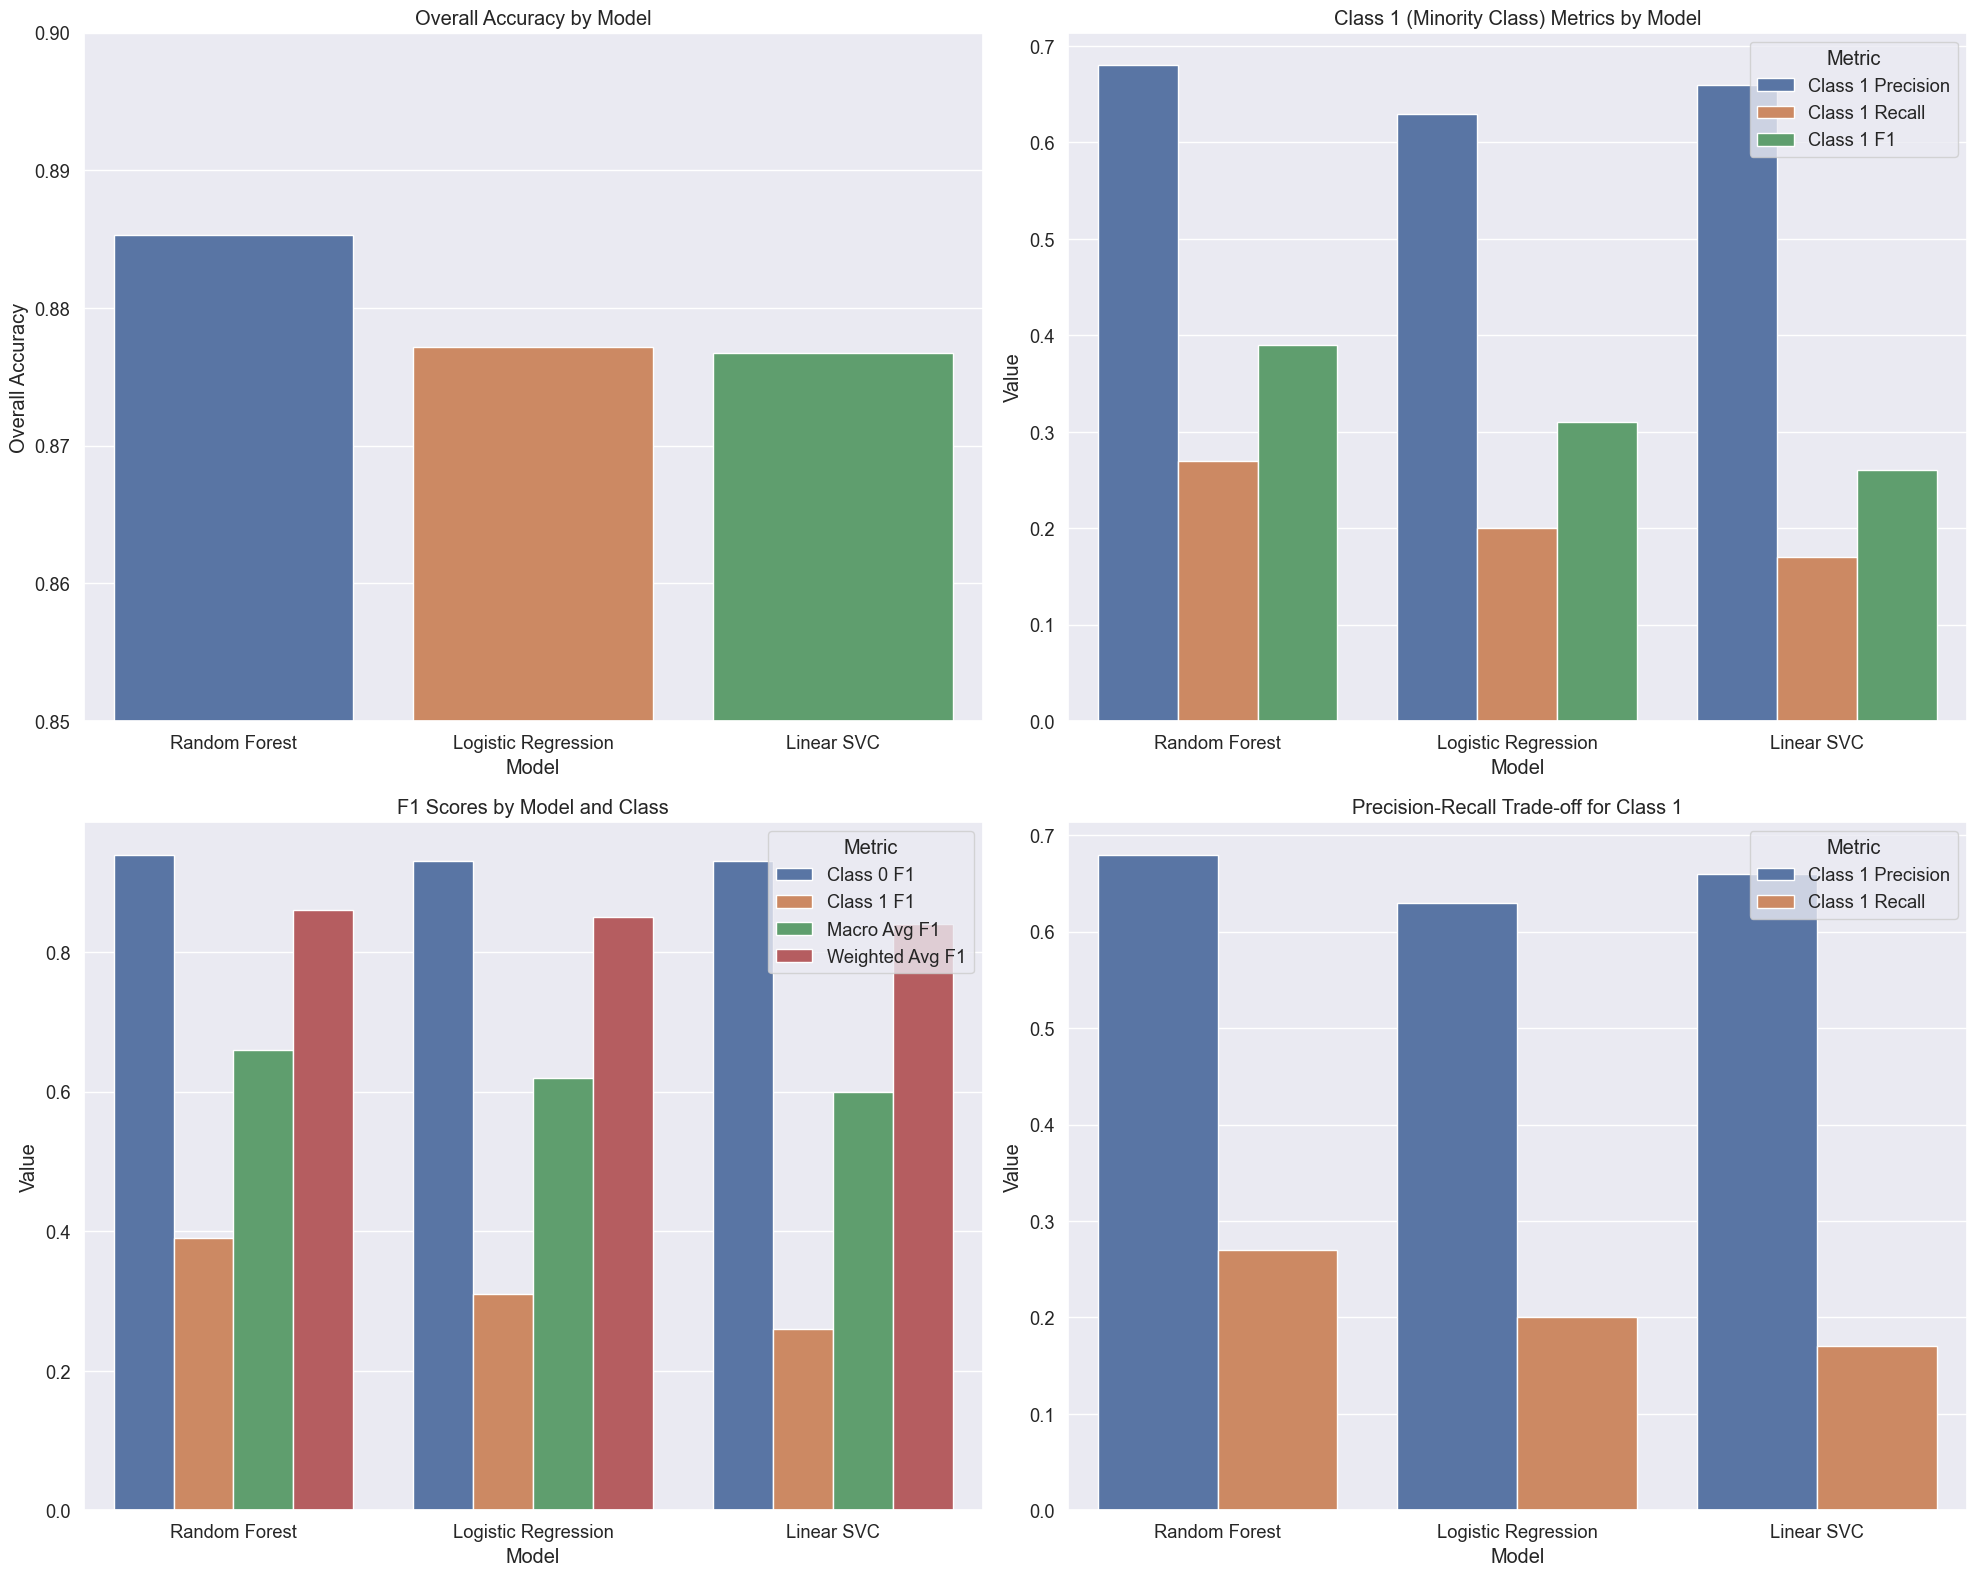


Detailed Model Comparison:
              Model  Overall Accuracy  Class 0 Precision  Class 0 Recall  Class 0 F1  Class 1 Precision  Class 1 Recall  Class 1 F1  Macro Avg F1  Weighted Avg F1
      Random Forest          0.885311               0.90            0.98        0.94               0.68            0.27        0.39          0.66             0.86
Logistic Regression          0.877187               0.89            0.98        0.93               0.63            0.20        0.31          0.62             0.85
         Linear SVC          0.876764               0.88            0.99        0.93               0.66            0.17        0.26          0.60             0.84

Key Observations:
1. Class Imbalance: There's significant class imbalance (49154 vs 7591 samples)
2. Best Overall Model: Random Forest (Accuracy: 0.885, F1: 0.86)
3. Class 1 (Minority) Challenge: All models struggle with Class 1 recall
4. Trade-offs:
   - Random Forest: Best balance between precision and recall
   - L

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, cohen_kappa_score, confusion_matrix,
    roc_curve, auc, balanced_accuracy_score
)

# Create a function to calculate all metrics
def calculate_comprehensive_metrics(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Precision (Class 0)': precision_score(y_true, y_pred, pos_label=0),
        'Precision (Class 1)': precision_score(y_true, y_pred, pos_label=1),
        'Recall (Class 0)': recall_score(y_true, y_pred, pos_label=0),
        'Recall (Class 1)': recall_score(y_true, y_pred, pos_label=1),
        'F1 Score (Class 0)': f1_score(y_true, y_pred, pos_label=0),
        'F1 Score (Class 1)': f1_score(y_true, y_pred, pos_label=1),
        'Matthews Correlation Coef': matthews_corrcoef(y_true, y_pred),
        'Cohen Kappa': cohen_kappa_score(y_true, y_pred)
    }
    
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
        metrics['ROC AUC'] = auc(fpr, tpr)
    
    return metrics

# Create comparison dataframe
models_comparison = pd.DataFrame([
    {
        'Model': 'Random Forest',
        'Overall Accuracy': 0.885311,
        'Class 0 Precision': 0.90,
        'Class 0 Recall': 0.98,
        'Class 0 F1': 0.94,
        'Class 1 Precision': 0.68,
        'Class 1 Recall': 0.27,
        'Class 1 F1': 0.39,
        'Macro Avg F1': 0.66,
        'Weighted Avg F1': 0.86
    },
    {
        'Model': 'Logistic Regression',
        'Overall Accuracy': 0.877187,
        'Class 0 Precision': 0.89,
        'Class 0 Recall': 0.98,
        'Class 0 F1': 0.93,
        'Class 1 Precision': 0.63,
        'Class 1 Recall': 0.20,
        'Class 1 F1': 0.31,
        'Macro Avg F1': 0.62,
        'Weighted Avg F1': 0.85
    },
    {
        'Model': 'Linear SVC',
        'Overall Accuracy': 0.876764,
        'Class 0 Precision': 0.88,
        'Class 0 Recall': 0.99,
        'Class 0 F1': 0.93,
        'Class 1 Precision': 0.66,
        'Class 1 Recall': 0.17,
        'Class 1 F1': 0.26,
        'Macro Avg F1': 0.60,
        'Weighted Avg F1': 0.84
    }
])

# Plot comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Accuracy comparison
sns.barplot(data=models_comparison, x='Model', y='Overall Accuracy', ax=axes[0,0])
axes[0,0].set_title('Overall Accuracy by Model')
axes[0,0].set_ylim(0.85, 0.90)

# Class 1 (minority class) metrics
metrics_to_plot = ['Class 1 Precision', 'Class 1 Recall', 'Class 1 F1']
models_comparison_melted = pd.melt(models_comparison, 
                                 id_vars=['Model'], 
                                 value_vars=metrics_to_plot,
                                 var_name='Metric', value_name='Value')
sns.barplot(data=models_comparison_melted, x='Model', y='Value', hue='Metric', ax=axes[0,1])
axes[0,1].set_title('Class 1 (Minority Class) Metrics by Model')

# F1 Score comparison
metrics_to_plot = ['Class 0 F1', 'Class 1 F1', 'Macro Avg F1', 'Weighted Avg F1']
models_comparison_melted = pd.melt(models_comparison, 
                                 id_vars=['Model'], 
                                 value_vars=metrics_to_plot,
                                 var_name='Metric', value_name='Value')
sns.barplot(data=models_comparison_melted, x='Model', y='Value', hue='Metric', ax=axes[1,0])
axes[1,0].set_title('F1 Scores by Model and Class')

# Precision-Recall trade-off
metrics_to_plot = ['Class 1 Precision', 'Class 1 Recall']
models_comparison_melted = pd.melt(models_comparison, 
                                 id_vars=['Model'], 
                                 value_vars=metrics_to_plot,
                                 var_name='Metric', value_name='Value')
sns.barplot(data=models_comparison_melted, x='Model', y='Value', hue='Metric', ax=axes[1,1])
axes[1,1].set_title('Precision-Recall Trade-off for Class 1')

plt.tight_layout()
plt.show()

# Print detailed comparison table
print("\nDetailed Model Comparison:")
print(models_comparison.to_string(index=False))

# Key observations
print("\nKey Observations:")
print("1. Class Imbalance: There's significant class imbalance (49154 vs 7591 samples)")
print("2. Best Overall Model: Random Forest (Accuracy: 0.885, F1: 0.86)")
print("3. Class 1 (Minority) Challenge: All models struggle with Class 1 recall")
print("4. Trade-offs:")
print("   - Random Forest: Best balance between precision and recall")
print("   - Linear SVC: Highest Class 0 recall but lowest Class 1 recall")
print("   - Logistic Regression: Middle-ground performance")

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# adasyn = ADASYN(random_state=42)
# X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train, n_jobs=7)


print("Distribution after ADASYN:")